In [18]:
import pandas as pd
import re
import matplotlib.pyplot as plt

In [19]:
import os
os.listdir()

['.ipynb_checkpoints',
 'mBART-hien.logs',
 'Results and Plots.ipynb',
 'mBART-hien-plots.png',
 'BLEU.png',
 'mBARTen.logs',
 'Loss.png']

In [20]:
with open('mBARTen.logs',encoding='utf-8') as fp:
    data=fp.readlines()
    data=[line.strip() for line in data]

In [21]:
train_loss_list=[]
train_pplx_list=[]
train_nll_loss_list=[]
val_loss_list=[]
val_pplx_list=[]
val_nll_loss_list=[]
bleu_dic={}
bleu_normalized_dic={}

In [22]:
for line in data:
    if "valid on 'valid' subset" in line:
        val_loss= float(line.split('|')[5].strip().split('loss')[1])
        val_pplx= float(line.split('|')[7].strip().split('ppl')[1])
        val_nll_loss= float(line.split('|')[6].strip().split('nll_loss')[1])
        
        val_loss_list.append(val_loss)
        val_pplx_list.append(val_pplx)
        val_nll_loss_list.append(val_nll_loss)
        
    if "INFO | train | epoch" in line:
        train_loss=float(line.split('|')[4].strip().split('loss')[1])
        train_nll_loss=float(line.split('|')[5].strip().split('nll_loss')[1])
        train_pplx=float(line.split('|')[6].strip().split('ppl')[1])
        
        train_loss_list.append(train_loss)
        train_pplx_list.append(train_pplx)
        train_nll_loss_list.append(train_nll_loss)
    
    
    
    if "output_checkpoint" in line:
        if ('best' not in line and 'last' not in line):
            epoch=int(line.split('output_checkpoint')[1].split('.')[0])
            bleu=float(line.split(':')[1].strip().split(',')[0])
            bleu_norm=float(line.split(':')[1].strip().split(',')[1])
            
            bleu_dic[epoch]=bleu
            bleu_normalized_dic[epoch]=bleu_norm

In [23]:
from collections import OrderedDict
 
bleu_dic = OrderedDict(sorted(bleu_dic.items()))
bleu_normal_dic=OrderedDict(sorted(bleu_normalized_dic.items()))

In [24]:
bleu_list=list(bleu_dic.values())
bleu_normal_list=list(bleu_normal_dic.values())
epochs=list(bleu_dic.keys())

In [25]:
results_df=pd.DataFrame(list(zip(epochs,train_loss_list,val_loss_list,train_pplx_list,val_pplx_list,
                                 train_nll_loss_list,val_nll_loss_list,bleu_list,bleu_normal_list)),
                       columns=['Epoch','Train Loss','Val Loss','Train PPLX','Val PPLX',
                                'Train NLL Loss','Val NLL Loss','BLEU Score','BLEU Normalized'])

In [26]:
results_df.head()

,Epoch,Train Loss,Val Loss,Train PPLX,Val PPLX,Train NLL Loss,Val NLL Loss,BLEU Score,BLEU Normalized
0,1,51.809,24.301,1.651310e+16,3674970.00,53.874,21.809,0.6,0.5
1,2,22.538,16.685,2.004850e+06,10082.00,20.935,13.299,0.6,0.5
2,3,17.104,14.133,2.931420e+04,1551.04,14.839,10.599,0.7,0.6
3,4,15.469,12.939,8.525460e+03,608.23,13.058,9.248,1.5,1.3
4,5,14.350,12.298,3.495370e+03,351.22,11.771,8.456,2.8,2.6


In [27]:
results_df.tail()

,Epoch,Train Loss,Val Loss,Train PPLX,Val PPLX,Train NLL Loss,Val NLL Loss,BLEU Score,BLEU Normalized
35,36,6.363,6.569,8.64,8.92,3.111,3.157,14.2,17.4
36,37,6.311,6.546,8.29,8.76,3.051,3.131,14.3,17.3
37,38,6.254,6.572,7.92,8.61,2.986,3.106,14.2,17.4
38,39,6.211,6.507,7.64,8.61,2.934,3.107,14.3,17.7
39,40,6.159,6.510,7.34,8.50,2.875,3.087,14.1,17.3


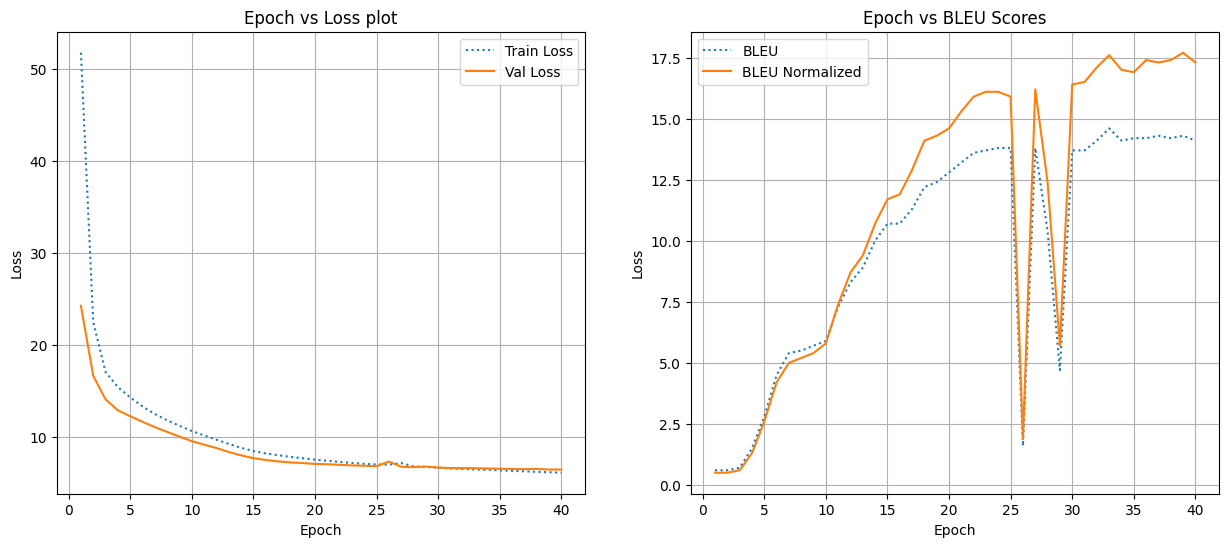

In [28]:
plt.figure(figsize=(15,6))
plt.subplot(121)
plt.plot(results_df['Epoch'],results_df['Train Loss'],ls='dotted')
plt.plot(results_df['Epoch'],results_df['Val Loss'],ls='-')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch vs Loss plot')
plt.grid()
plt.legend(labels=['Train Loss','Val Loss'])
plt.subplot(122)
plt.plot(results_df['Epoch'],results_df['BLEU Score'],ls='dotted')
plt.plot(results_df['Epoch'],results_df['BLEU Normalized'],ls='-')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch vs BLEU Scores')
plt.grid()
plt.legend(labels=['BLEU','BLEU Normalized'])
plt.show()